In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [4]:
df = pd.read_csv('car_evaluation.csv')
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
X = df.drop('class', axis=1)
y = df['class']

In [8]:
encoder = OneHotEncoder(drop='first')
encoded_X = pd.DataFrame(encoder.fit_transform(X).todense(),
            columns=encoder.get_feature_names(X.columns))

In [9]:
encoded_X

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1723,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1724,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1725,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [10]:
encoder = OneHotEncoder(drop='first')
encoded_y = pd.DataFrame(encoder.fit_transform(pd.DataFrame(y)).todense())

In [11]:
encoded_y.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [12]:
entropy([5/6, 1/6], base=2)

0.6500224216483541

In [13]:
encoded_X.to_csv('decision_tree_X.csv', header=False)
encoded_y.to_csv('decision_tree_y.csv', header=False)

In [17]:
encoded_X.head()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
encoded_y.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [20]:
clf = DecisionTreeClassifier()
clf.fit(encoded_X, encoded_y)


DecisionTreeClassifier()

In [23]:
predictions = clf.predict(encoded_X)

In [24]:
predictions

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [22]:
encoded_y.values

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

[Text(3589.21875, 5266.125, 'X[13] <= 0.5\ngini = 0.19\nsamples = 1727\nvalue = [[1658, 69]\n[518, 1209]\n[1662, 65]]'),
 Text(3560.6033653846157, 4926.375, 'X[9] <= 0.5\ngini = 0.238\nsamples = 1152\nvalue = [[1083, 69]\n[518, 634]\n[1087, 65]]'),
 Text(2051.8125, 4586.625, 'X[10] <= 0.5\ngini = 0.204\nsamples = 768\nvalue = [[735, 33]\n[254, 514]\n[733, 35]]'),
 Text(2023.1971153846155, 4246.875, 'gini = 0.0\nsamples = 384\nvalue = [[384, 0]\n[0, 384]\n[384, 0]]'),
 Text(2080.4278846153848, 4246.875, 'X[12] <= 0.5\ngini = 0.257\nsamples = 384\nvalue = [[351, 33]\n[254, 130]\n[349, 35]]'),
 Text(1201.8461538461538, 3907.125, 'X[5] <= 0.5\ngini = 0.249\nsamples = 256\nvalue = [[232, 24]\n[200, 56]\n[221, 35]]'),
 Text(772.6153846153846, 3567.375, 'X[14] <= 0.5\ngini = 0.24\nsamples = 192\nvalue = [[168, 24]\n[170, 22]\n[157, 35]]'),
 Text(357.69230769230774, 3227.625, 'X[0] <= 0.5\ngini = 0.226\nsamples = 96\nvalue = [[93, 3]\n[88, 8]\n[61, 35]]'),
 Text(171.6923076923077, 2887.875, 'X

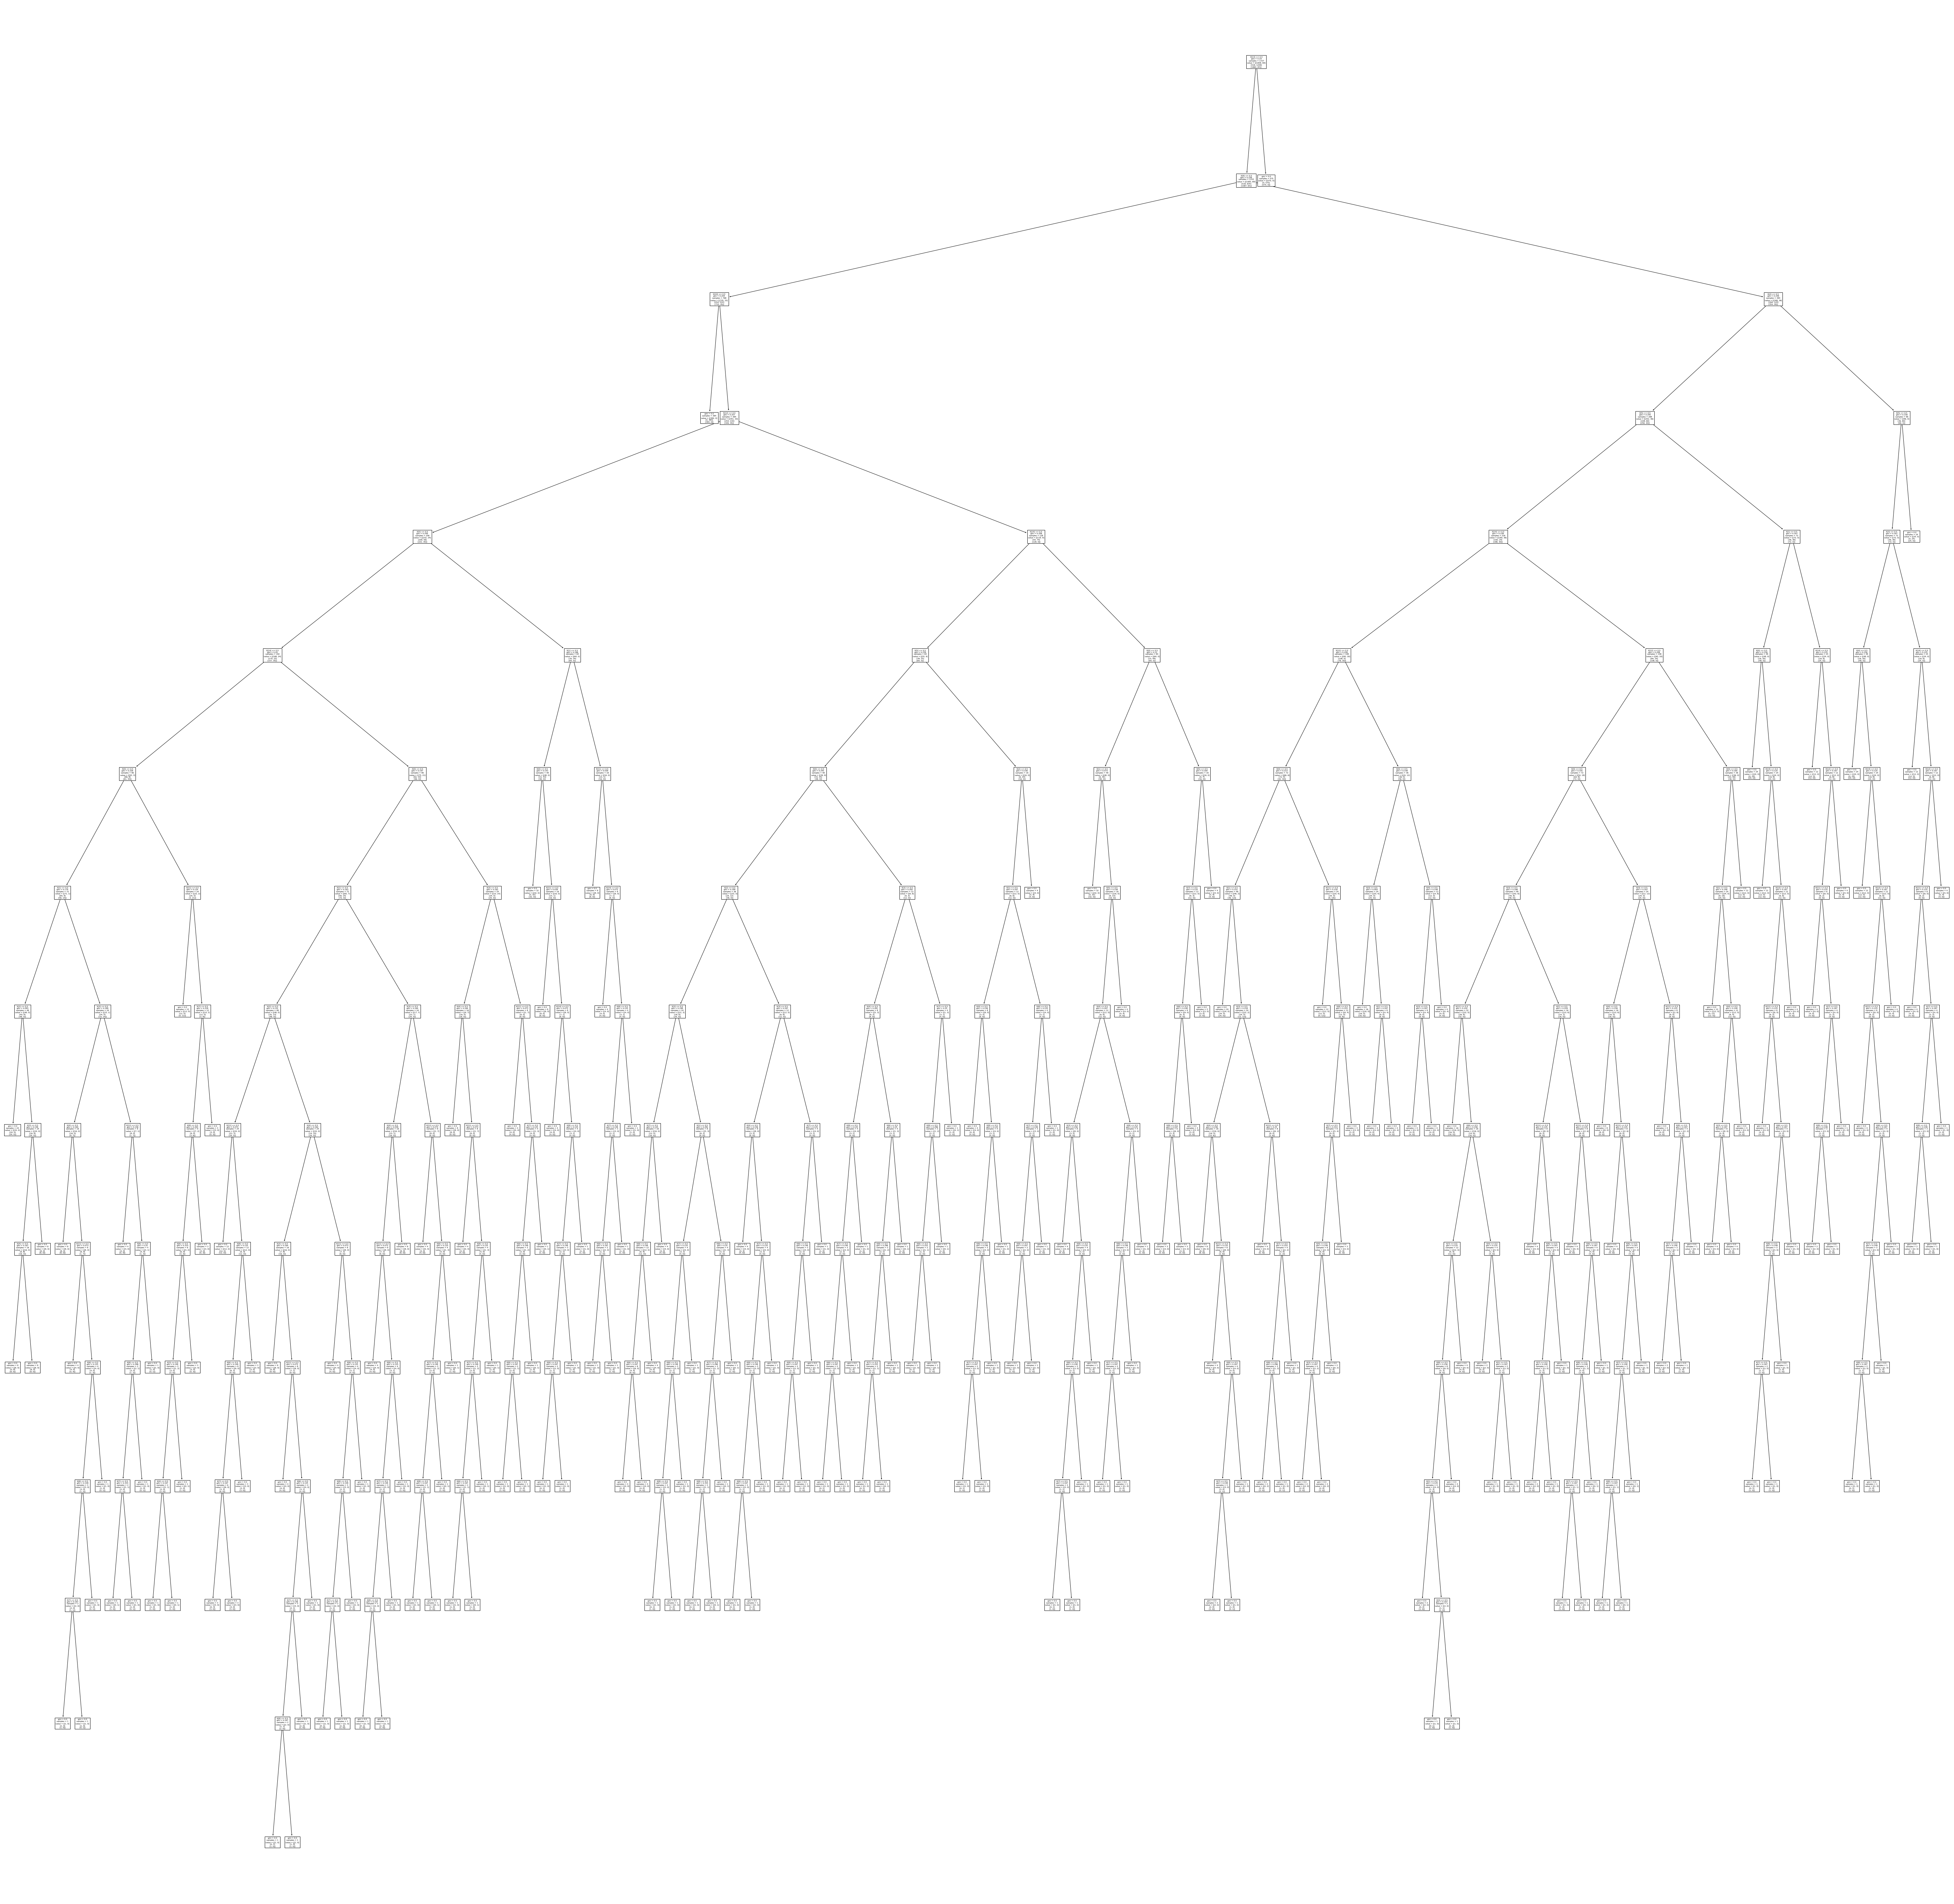

In [29]:
plt.figure(figsize=(100, 100))

tree.plot_tree(clf)

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=encoded_X.columns,  
                      class_names=encoded_y.columns,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  